# Plotting Choropleth Maps using Python
---
A choropleth map uses colour coding to indicate quantitative values across geographical areas on a map.

![](https://datavizcatalogue.com/methods/images/anatomy/choropleth.png)

>A choropleth map is a type of thematic map in which areas are shaded or patterned in proportion to a statistical variable that represents an aggregate summary of a geographic characteristic within each area, such as population density or per-capita income.

## Terminologies
---

## [Plotly](https://plotly.com/)
Plotly is a technical computing company that develops online data analytics and visualization tools. Plotly provides online graphing, analytics, and statistics tools for individuals and collaboration, as well as scientific graphing libraries for Python, R, MATLAB, Perl, Julia, Arduino, and REST.

### [plotly.py](https://plotly.com/python/)
An interactive, open-source, and browser-based graphing library for Python.

```bash
$ pip install plotly
```

>Plotly Express is a new high-level Python visualization library: it's a wrapper for Plotly.py that exposes a simple syntax for complex charts.

### [GeoJSON](https://geojson.org/)
An open standard format designed for representing simple geographical features, along with their non-spatial attributes.

### [Mapbox](https://mapbox.com/)
An open source mapping platform for custom designed maps.

In [2]:
import json
import numpy as np
import pandas as pd
import plotly.express as px

In [3]:
import plotly.io as pio
pio.renderers.default = 'browser'

In [4]:
india_states = json.load(open("states_india.geojson", "r"))

In [5]:
len(india_states["features"])

36

In [8]:
india_states["features"][0].keys()

dict_keys(['type', 'geometry', 'properties'])

In [10]:
india_states['features'][0]['properties']

{'cartodb_id': 1, 'state_code': 0, 'st_nm': 'Telangana'}

In [11]:
state_id_map = {}
for feature in india_states["features"]:
    feature["id"] = feature["properties"]["state_code"]
    state_id_map[feature["properties"]["st_nm"]] = feature["id"]

In [12]:
state_id_map[feature["properties"]["st_nm"]]

7

In [13]:
df = pd.read_csv("india_census.csv")
df["Density"] = df["Density[a]"].apply(lambda x: int(x.split("/")[0].replace(",", "")))
df["id"] = df["State or union territory"].apply(lambda x: state_id_map[x])

In [14]:
df.head()

,Rank,State or union territory,Population,Population (%),Decadal growth(2001–2011),Rural population,Percent rural,Urban population,Percent urban,Area[16],Density[a],Sex ratio,Density,id
0,1.0,Uttar Pradesh,199812341,NaN,20.20%,155317278,NaN,44495063,NaN,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912,828,9
1,2.0,Maharashtra,112374333,NaN,20.00%,61556074,NaN,50818259,NaN,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929,365,27
2,3.0,Bihar,104099452,NaN,25.40%,92341436,NaN,11758016,NaN,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918,1102,10
3,4.0,West Bengal,91276115,NaN,13.80%,62183113,NaN,29093002,NaN,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953,1029,19
4,5.0,Madhya Pradesh,72626809,NaN,16.30%,52557404,NaN,20069405,NaN,"308,245 km2 (119,014 sq mi)",236/km2 (610/sq mi),931,236,23


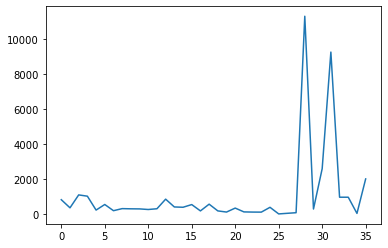

In [15]:
df["Density"].plot()

In [16]:
df["DensityScale"] = np.log10(df["Density"])

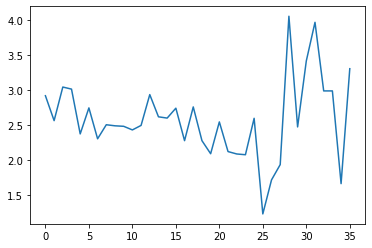

In [17]:
df["DensityScale"].plot()

In [18]:
df

,Rank,State or union territory,Population,Population (%),Decadal growth(2001–2011),Rural population,Percent rural,Urban population,Percent urban,Area[16],Density[a],Sex ratio,Density,id,DensityScale
0,1.0,Uttar Pradesh,199812341,NaN,20.20%,155317278,NaN,44495063,NaN,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912,828,9,2.918030
1,2.0,Maharashtra,112374333,NaN,20.00%,61556074,NaN,50818259,NaN,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929,365,27,2.562293
2,3.0,Bihar,104099452,NaN,25.40%,92341436,NaN,11758016,NaN,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918,1102,10,3.042182
3,4.0,West Bengal,91276115,NaN,13.80%,62183113,NaN,29093002,NaN,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953,1029,19,3.012415
4,5.0,Madhya Pradesh,72626809,NaN,16.30%,52557404,NaN,20069405,NaN,"308,245 km2 (119,014 sq mi)",236/km2 (610/sq mi),931,236,23,2.372912
5,6.0,Tamil Nadu,72147030,NaN,15.60%,37229590,NaN,34917440,NaN,"130,058 km2 (50,216 sq mi)","555/km2 (1,440/sq mi)",996,555,33,2.744293
6,7.0,Rajasthan,68548437,NaN,21.30%,51500352,NaN,17048085,NaN,"342,239 km2 (132,139 sq mi)",201/km2 (520/sq mi),928,201,8,2.303196
7,8.0,Karnataka,61095297,NaN,15.60%,37469335,NaN,23625962,NaN,"191,791 km2 (74,051 sq mi)",319/km2 (830/sq mi),973,319,29,2.503791
8,9.0,Gujarat,60439692,NaN,19.30%,34694609,NaN,25745083,NaN,"196,024 km2 (75,685 sq mi)",308/km2 (800/sq mi),919,308,24,2.488551
9,10.0,Andhra Pradesh,49577103,NaN,11.00%,34966693,NaN,14610410,NaN,"162,968 km2 (62,922 sq mi)",303/km2 (780/sq mi),993,303,28,2.481443


In [19]:
india_states['features'][0]

{'type': 'Feature',
 'geometry': {'type': 'MultiPolygon',
  'coordinates': [[[[78.34088, 19.883615],
     [78.351327, 19.88184],
     [78.370422, 19.883346],
     [78.379149, 19.879733],
     [78.388848, 19.879703],
     [78.389673, 19.874372],
     [78.388883, 19.864121],
     [78.390691, 19.856213],
     [78.390645, 19.853215],
     [78.39395, 19.846705],
     [78.402384, 19.836943],
     [78.413779, 19.830435],
     [78.433447, 19.8237],
     [78.449385, 19.819844],
     [78.469482, 19.816847],
     [78.481036, 19.817011],
     [78.489156, 19.807863],
     [78.494337, 19.799196],
     [78.498808, 19.793852],
     [78.508559, 19.793125],
     [78.514515, 19.801887],
     [78.517292, 19.814976],
     [78.52413, 19.820588],
     [78.531195, 19.822351],
     [78.562889, 19.81634],
     [78.57869, 19.814543],
     [78.590001, 19.81245],
     [78.596781, 19.816171],
     [78.600308, 19.818109],
     [78.608696, 19.818273],
     [78.6194, 19.814049],
     [78.624399, 19.809511],
     [78.6

In [20]:
fig = px.choropleth(
    df,
    locations="id",
    geojson=india_states,
    color="DensityScale",
    hover_name="State or union territory",
    hover_data=["Density"],
    title="India Population Density",
)
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

![](https://i.imgur.com/WZWtu67.png)

In [22]:
fig = px.choropleth_mapbox(
    df,
    locations="id",
    geojson=india_states,
    color="DensityScale",
    hover_name="State or union territory",
    hover_data=["Density"],
    title="India Population Density",
    mapbox_style="carto-positron",
    center={"lat": 24, "lon": 78},
    zoom=3,
    opacity=0.5,
)

![](https://i.imgur.com/az9x32O.png)

In [23]:
df["SexRatioScale"] = df["Sex ratio"] - 1000

In [24]:
fig = px.choropleth(
    df,
    locations="id",
    geojson=india_states,
    color="SexRatioScale",
    hover_name="State or union territory",
    hover_data=["Sex ratio"],
    title="India Sex Ratio",
    color_continuous_scale=px.colors.diverging.BrBG,
    color_continuous_midpoint=0,
)
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

![](https://i.imgur.com/0ZIBaR6.png)

## References

- https://en.wikipedia.org/wiki/List_of_states_and_union_territories_of_India_by_population

- https://un-mapped.carto.com/tables/states_india/public/map

- https://plotly.com/python/choropleth-maps/

- https://plotly.com/python/colorscales/

- https://www.mapbox.com/

- https://plotly.com/python/mapbox-county-choropleth/

- https://plotly.com/python/mapbox-layers/